# Import libraries

In [2]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import os

#from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris

# Read csv file

In [3]:
p = os.getcwd()
print(p)

os.chdir("..")
d = os.getcwd()
print(d)



dirname = os.path.dirname(d)
csvfile = os.path.join(d, 'datasets/cartoon_set/labels.csv')
dirname = os.path.dirname(d)
imgfile = os.path.join(d, 'datasets/cartoon_set/img/')

dataset = pd.read_csv(csvfile, sep='\\t', engine='python')

dataset.head()

/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678/B2
/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678


,eye_color,face_shape,file_name
0,1,4,0.png
1,2,4,1.png
2,2,3,2.png
3,2,0,3.png
4,0,2,4.png


# Load and preprocess data

In [4]:
dataset_image = []
for i in tqdm(range(dataset.shape[0])):
    img = image.load_img(imgfile+dataset['file_name'][i], target_size=(100,100))
    img = image.img_to_array(img)
    img = img/255

    dataset_image.append(img)

100%|██████████| 10000/10000 [01:10<00:00, 142.69it/s]


# Label and split data

In [5]:
# Label the data
x = np.array(dataset_image)
y = dataset['eye_color']

In [6]:
# Split the data into training and testing(75% training and 25% testing data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [7]:
x.shape

(10000, 100, 100, 3)

In [8]:
#Convert data type to 'float32'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
#One-hot encoding of data
n_classes = 5
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (7500,)
Shape after one-hot encoding:  (7500, 5)


# Optimise batch size

In [10]:
#batch size 128

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 100 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
59/59 [==============================] - 49s 838ms/step - loss: 1.6785 - accuracy: 0.2259 - val_loss: 1.8759 - val_accuracy: 0.2296
Epoch 2/100
59/59 [==============================] - 50s 854ms/step - loss: 1.0764 - accuracy: 0.5916 - val_loss: 1.4857 - val_accuracy: 0.4068
Epoch 3/100
59/59 [==============================] - 50s 839ms/step - loss: 0.4525 - accuracy: 0.8380 - val_loss: 1.3941 - val_accuracy: 0.6656
Epoch 4/100
59/59 [==============================] - 52s 882ms/step - loss: 0.3662 - accuracy: 0.8575 - val_loss: 1.2906 - val_accuracy: 0.6144
Epoch 5/100
59/59 [==============================] - 50s 847ms/step - loss: 0.3127 - accuracy: 0.8753 - val_loss: 1.1577 - val_accuracy: 0.6704
Epoch 6/100
59/59 [==============================] - 49s 824ms/step - loss: 0.2723 - accuracy: 0.8943 - val_loss: 1.0106 - val_accuracy: 0.7452
Epoch 7/100
59/59 [==============================] - 48s 820ms/step - loss: 0.2505 - accuracy: 0.9032 - val_loss: 0.9368 - val_accuracy:

In [10]:
#batch size 64

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 100 epochs
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
118/118 [==============================] - 55s 468ms/step - loss: 1.6988 - accuracy: 0.2299 - val_loss: 1.6449 - val_accuracy: 0.3300
Epoch 2/100
118/118 [==============================] - 51s 429ms/step - loss: 0.9364 - accuracy: 0.6669 - val_loss: 1.7137 - val_accuracy: 0.2072
Epoch 3/100
118/118 [==============================] - 51s 435ms/step - loss: 0.4627 - accuracy: 0.8337 - val_loss: 1.3282 - val_accuracy: 0.2312
Epoch 4/100
118/118 [==============================] - 51s 431ms/step - loss: 0.3862 - accuracy: 0.8539 - val_loss: 1.0145 - val_accuracy: 0.6856
Epoch 5/100
118/118 [==============================] - 51s 433ms/step - loss: 0.3400 - accuracy: 0.8721 - val_loss: 0.7317 - val_accuracy: 0.7860
Epoch 6/100
118/118 [==============================] - 51s 434ms/step - loss: 0.3042 - accuracy: 0.8788 - val_loss: 0.4623 - val_accuracy: 0.8428
Epoch 7/100
118/118 [==============================] - 51s 432ms/step - loss: 0.2689 - accuracy: 0.8983 - val_loss: 0.4268 -

In [11]:
#batch size 256

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 100 epochs
model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/256
59/59 [==============================] - 46s 777ms/step - loss: 1.7328 - accuracy: 0.2341 - val_loss: 1.8202 - val_accuracy: 0.1972
Epoch 2/256
59/59 [==============================] - 47s 790ms/step - loss: 1.0897 - accuracy: 0.6013 - val_loss: 1.4905 - val_accuracy: 0.3400
Epoch 3/256
59/59 [==============================] - 46s 775ms/step - loss: 0.4924 - accuracy: 0.8292 - val_loss: 1.3075 - val_accuracy: 0.4432
Epoch 4/256
59/59 [==============================] - 47s 794ms/step - loss: 0.3693 - accuracy: 0.8611 - val_loss: 1.1236 - val_accuracy: 0.6768
Epoch 5/256
59/59 [==============================] - 46s 783ms/step - loss: 0.3224 - accuracy: 0.8783 - val_loss: 0.9044 - val_accuracy: 0.8236
Epoch 6/256
59/59 [==============================] - 46s 773ms/step - loss: 0.2972 - accuracy: 0.8879 - val_loss: 0.7775 - val_accuracy: 0.8232
Epoch 7/256
59/59 [==============================] - 46s 784ms/step - loss: 0.2670 - accuracy: 0.8989 - val_loss: 0.6351 - val_accuracy:

In [ ]:
#Batch size 256 has highest accuracy

# Optimise optimiser

In [20]:
#Evaluate SGD optimizer

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 100 epochs
history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 49s 2s/step - loss: 1.5428 - accuracy: 0.3708 - val_loss: 1.5396 - val_accuracy: 0.2608
Epoch 2/100
30/30 [==============================] - 50s 2s/step - loss: 0.6214 - accuracy: 0.7905 - val_loss: 1.4435 - val_accuracy: 0.5788
Epoch 3/100
30/30 [==============================] - 49s 2s/step - loss: 0.3999 - accuracy: 0.8512 - val_loss: 1.3713 - val_accuracy: 0.6764
Epoch 4/100
30/30 [==============================] - 48s 2s/step - loss: 0.3503 - accuracy: 0.8657 - val_loss: 1.3285 - val_accuracy: 0.6448
Epoch 5/100
30/30 [==============================] - 49s 2s/step - loss: 0.3207 - accuracy: 0.8785 - val_loss: 1.2493 - val_accuracy: 0.7896
Epoch 6/100
30/30 [==============================] - 48s 2s/step - loss: 0.2966 - accuracy: 0.8880 - val_loss: 1.1770 - val_accuracy: 0.8244
Epoch 7/100
30/30 [==============================] - 48s 2s/step - loss: 0.2759 - accuracy: 0.8959 - val_loss: 1.1081 - val_accuracy: 0.8292
Epoch 8/100
3

In [10]:
#Evalute RMSprop optimizer

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='RMSProp')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 100 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 55s 2s/step - loss: 1.8032 - accuracy: 0.2419 - val_loss: 1.6267 - val_accuracy: 0.2628
Epoch 2/100
30/30 [==============================] - 52s 2s/step - loss: 1.2418 - accuracy: 0.5533 - val_loss: 1.4491 - val_accuracy: 0.3920
Epoch 3/100
30/30 [==============================] - 54s 2s/step - loss: 0.5759 - accuracy: 0.8117 - val_loss: 1.3053 - val_accuracy: 0.5296
Epoch 4/100
30/30 [==============================] - 51s 2s/step - loss: 0.4292 - accuracy: 0.8429 - val_loss: 1.1473 - val_accuracy: 0.5416
Epoch 5/100
30/30 [==============================] - 52s 2s/step - loss: 0.3599 - accuracy: 0.8636 - val_loss: 1.9779 - val_accuracy: 0.4192
Epoch 6/100
30/30 [==============================] - 51s 2s/step - loss: 0.3276 - accuracy: 0.8789 - val_loss: 0.8550 - val_accuracy: 0.7640
Epoch 7/100
30/30 [==============================] - 52s 2s/step - loss: 0.2769 - accuracy: 0.8917 - val_loss: 0.8199 - val_accuracy: 0.7744
Epoch 8/100
3

In [11]:
#SGD optimiser selected

# Evaluate number of convolutional layers

In [12]:
#Evaluate with 2 convolutional layers

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 100 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 138s 5s/step - loss: 1.6695 - accuracy: 0.2319 - val_loss: 2.2170 - val_accuracy: 0.2296
Epoch 2/100
30/30 [==============================] - 131s 4s/step - loss: 1.5637 - accuracy: 0.3185 - val_loss: 1.5985 - val_accuracy: 0.2072
Epoch 3/100
30/30 [==============================] - 130s 4s/step - loss: 0.9734 - accuracy: 0.6703 - val_loss: 1.4934 - val_accuracy: 0.2072
Epoch 4/100
30/30 [==============================] - 129s 4s/step - loss: 0.4989 - accuracy: 0.8375 - val_loss: 1.4284 - val_accuracy: 0.2184
Epoch 5/100
30/30 [==============================] - 129s 4s/step - loss: 0.4048 - accuracy: 0.8495 - val_loss: 1.3741 - val_accuracy: 0.3428
Epoch 6/100
30/30 [==============================] - 606s 20s/step - loss: 0.3664 - accuracy: 0.8629 - val_loss: 1.2867 - val_accuracy: 0.8236
Epoch 7/100
30/30 [==============================] - 131s 4s/step - loss: 0.3421 - accuracy: 0.8687 - val_loss: 1.2360 - val_accuracy: 0.7716
Epoch

In [ ]:
#One convolutional layer selected

# Investigate number of hidden layers

In [13]:
#Evaluate model with 2 hidden layers

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 100 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 51s 2s/step - loss: 1.6557 - accuracy: 0.2196 - val_loss: 2.0026 - val_accuracy: 0.2084
Epoch 2/100
30/30 [==============================] - 51s 2s/step - loss: 1.6099 - accuracy: 0.2599 - val_loss: 1.6681 - val_accuracy: 0.2060
Epoch 3/100
30/30 [==============================] - 51s 2s/step - loss: 1.6032 - accuracy: 0.2496 - val_loss: 1.8149 - val_accuracy: 0.2068
Epoch 4/100
30/30 [==============================] - 51s 2s/step - loss: 1.6094 - accuracy: 0.2385 - val_loss: 1.6136 - val_accuracy: 0.2148
Epoch 5/100
30/30 [==============================] - 51s 2s/step - loss: 1.5960 - accuracy: 0.2592 - val_loss: 1.6118 - val_accuracy: 0.2376
Epoch 6/100
30/30 [==============================] - 51s 2s/step - loss: 1.5816 - accuracy: 0.2949 - val_loss: 1.6999 - val_accuracy: 0.2160
Epoch 7/100
30/30 [==============================] - 51s 2s/step - loss: 1.5696 - accuracy: 0.2905 - val_loss: 1.6348 - val_accuracy: 0.2464
Epoch 8/100
3

In [12]:
#One hidden layer selected

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


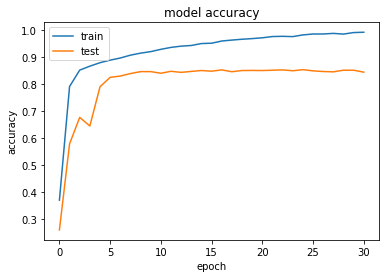

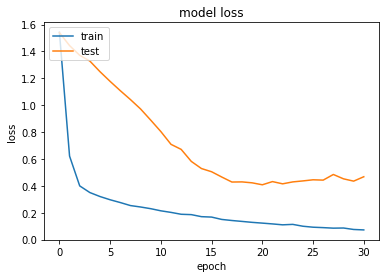

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Find accuracy on test set

In [16]:
#Use Pandas to read csv file

p = os.getcwd()
print(p)

dirname = os.path.dirname(d)
csvtest = os.path.join(d, 'test/cartoon_set_test/labels.csv')
dirname = os.path.dirname(d)
imgtest = os.path.join(d, 'test/cartoon_set_test/img/')

dataset = pd.read_csv(csvfile, sep='\\t', engine='python')

dataset.head()

test_dataset = pd.read_csv(csvtest, sep='\\t', engine='python')

test_dataset.head()

/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678


,eye_color,face_shape,file_name
0,2,1,0.png
1,1,4,1.png
2,0,2,2.png
3,0,2,3.png
4,3,3,4.png


In [17]:
test_dataset_image = []
for i in tqdm(range(test_dataset.shape[0])):
    img = image.load_img(imgtest+test_dataset['file_name'][i], target_size=(100,100))
    img = img.convert('L')
    img = image.img_to_array(img)
    img = img/255

    test_dataset_image.append(img)

100%|██████████| 2500/2500 [00:19<00:00, 127.18it/s]


In [18]:
# Label the data and one-hot encoding
X_TEST = np.array(test_dataset_image)
Y_TEST = test_dataset['eye_color']

n_classes = 5
Y_TEST = np_utils.to_categorical(Y_TEST, n_classes)

In [19]:
#Dropout removed

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 100 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 50s 2s/step - loss: 1.6964 - accuracy: 0.2444 - val_loss: 2.1524 - val_accuracy: 0.2044
Epoch 2/100
30/30 [==============================] - 49s 2s/step - loss: 1.5782 - accuracy: 0.3052 - val_loss: 1.8408 - val_accuracy: 0.1924
Epoch 3/100
30/30 [==============================] - 50s 2s/step - loss: 1.5771 - accuracy: 0.3120 - val_loss: 1.7665 - val_accuracy: 0.2192
Epoch 4/100
30/30 [==============================] - 49s 2s/step - loss: 1.5645 - accuracy: 0.3241 - val_loss: 1.6967 - val_accuracy: 0.1936
Epoch 5/100
30/30 [==============================] - 49s 2s/step - loss: 1.5250 - accuracy: 0.4243 - val_loss: 1.6222 - val_accuracy: 0.2068
Epoch 6/100
30/30 [==============================] - 49s 2s/step - loss: 0.8638 - accuracy: 0.7167 - val_loss: 1.5173 - val_accuracy: 0.5204
Epoch 7/100
30/30 [==============================] - 49s 2s/step - loss: 0.4571 - accuracy: 0.8437 - val_loss: 1.4288 - val_accuracy: 0.5556
Epoch 8/100
3